In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
path = "../output_data/craft_beer_nv.csv"
df = pd.read_csv(path)
df.head(5)

,Name,id,Alcohol By Volume,International Bitterness Units,Standard Reference Method,Style,Category,Brewer,City,State,Latitude,Longitude,Region
0,Possession Porter,723,5.6,0,0,Porter,Irish Ale,Diamond Knot Brewery & Alehouse,Mukilteo,Washington,47.9485,-122.3050,West
1,Free Bike Amber,742,4.5,0,0,American-Style Amber/Red Ale,North American Ale,Skagit River Brewing,Mount Vernon,Washington,48.4192,-122.3350,West
2,Potrero ESB,3982,5.2,0,0,Special Bitter or Best Bitter,British Ale,21st Amendment Brewery Cafe,San Francisco,California,37.7825,-122.3930,West
3,Twisted Kilt Scotch Ale,4221,5.0,0,0,Scotch Ale,British Ale,Thirsty Dog Brewing,Akron,Ohio,41.0689,-81.5172,Midwest
4,HarvestÃ¶r Fresh Hop Ale,5243,7.2,0,0,American-Style Pale Ale,North American Ale,Lift Bridge Brewery,Stillwater,Minnesota,45.0565,-92.8222,Midwest


In [4]:
df[['id','Region','Category']]

,id,Region,Category
0,723,West,Irish Ale
1,742,West,North American Ale
2,3982,West,British Ale
3,4221,Midwest,British Ale
4,5243,Midwest,North American Ale
...,...,...,...
1878,4884,Northeast,North American Ale
1879,5231,Southeast,North American Ale
1880,5310,West,Belgian and French Ale
1881,3429,Southeast,British Ale


In [5]:
df['Region'] != 'Unknown'

0       True
1       True
2       True
3       True
4       True
        ... 
1878    True
1879    True
1880    True
1881    True
1882    True
Name: Region, Length: 1883, dtype: bool

In [7]:
no_unknown_df = df.loc[df['Region'] != 'Unknown']
no_unknown_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1878 entries, 0 to 1882
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Name                            1878 non-null   object 
 1   id                              1878 non-null   int64  
 2   Alcohol By Volume               1878 non-null   float64
 3   International Bitterness Units  1878 non-null   int64  
 4   Standard Reference Method       1878 non-null   int64  
 5   Style                           1878 non-null   object 
 6   Category                        1878 non-null   object 
 7   Brewer                          1878 non-null   object 
 8   City                            1878 non-null   object 
 9   State                           1878 non-null   object 
 10  Latitude                        1878 non-null   float64
 11  Longitude                       1878 non-null   float64
 12  Region                          18

In [8]:
group_df = no_unknown_df[['Region','Category']].groupby(['Region','Category']).size().unstack()
group_df.head()

Category,Belgian and French Ale,British Ale,German Ale,German Lager,Irish Ale,North American Ale,North American Lager,Other Style
Region,,,,,,,,
Midwest,36,37,12,28,16,174,60,30
Northeast,73,55,32,70,31,291,40,71
Southeast,12,7,2,4,8,44,2,8
Southwest,6,7,6,6,4,34,14,6
West,60,51,18,45,41,363,35,39


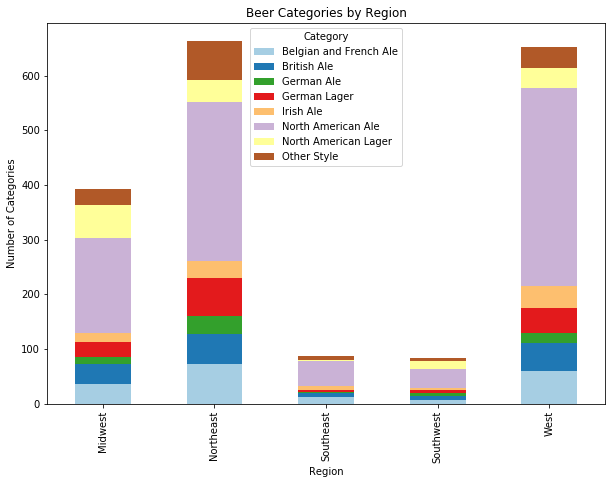

<Figure size 432x288 with 0 Axes>

In [9]:
group_df.plot.bar(stacked = True,
                             title = 'Beer Categories by Region',
                             colormap = 'Paired',
                             #color = ('dodgerblue', 'blue', 'green', 'deepskyblue', 'crimson', 'yellow', 'dimgrey','red'),
                             figsize = (10, 7))
plt.ylabel ('Number of Categories')
plt.xlabel ('Region')
plt.savefig("../Images/category_stacked_bar_plot.png")
plt.show()
